Consulting For The Boston Police: Exploring Boston Crime Data.

Consultants: Team 8: Tyler McMurray, Qiuhao Chenyong, Senbo Zhang, Zinan Chen, & Siyu Liu

Dataset link: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston

Who we are and what we are solving: We are consulting for the police in Boston. We are trying to answer how to more appropriately manage the resources of employees and the police. More specifically we are going to assign police officers with certain specialities in areas with higher crimes where they have experience in. Also we are going to look at areas and times with more crime rates. We will assign more police officers there and reduce officers in areas with low crime rates and or time.

Assumptions:
We have the ability to acquire different forms of talent and assign them wherever. 
We are not focusing on the by-laws and regulations of a city, like x amount of police officers must be in each zone, we are looking at what we assume is effectiveness.
We are assuming the movement of employees schedules won’t impact their work and satisfaction and they are indifferent to the movement.
We are not looking at prices but rather the movement necessary for our assessments. 

We have Boston Crime Data form June 2015 to September 2018. We have been hired to help allocate officers and train and hire certain police skills based on this data. The Boston Police are trying to adapt to the new data driven world and harness the power of their data that they have collected. We are here to breakdown the data and consult back to the Boston Police with our findings. We want to start and show very genereal information about Boston as a whole. We will make some recommendations that all of Boston Police should follow. We will then go break it down farther by district and the types of crimes. After we have made our recommendations we will start to go deeper into the data and see how crime is related to seasonality and also by the time of day. So we can more effectively allocate police officers on certain months of the year and certain shifts of the day. We will finally show the Police Officers another way to breakdown their data, by neighborhood, we will look at an area related to all of us, crime near and on Boston University. 

We can look at the Boston Crime data and break it down very generealy to each district. Can we better allocate Police Officers to certain districts with more crime? 

In [50]:
%%bq query -n crimes_districts_boston
select distinct districtname, 
      count(INCIDENT_NUMBER) OVER(PARTITION BY districtname)as count, 
      count (INCIDENT_NUMBER) OVER(PARTITION BY districtname)/ d.population as ratio from `team-8-the-great.crime_in_boston.crime` as c 
      inner join `team-8-the-great.crime_in_boston.districtname` as d on c.DISTRICT  = d.district
       where c.DISTRICT is not NULL 
order by ratio desc

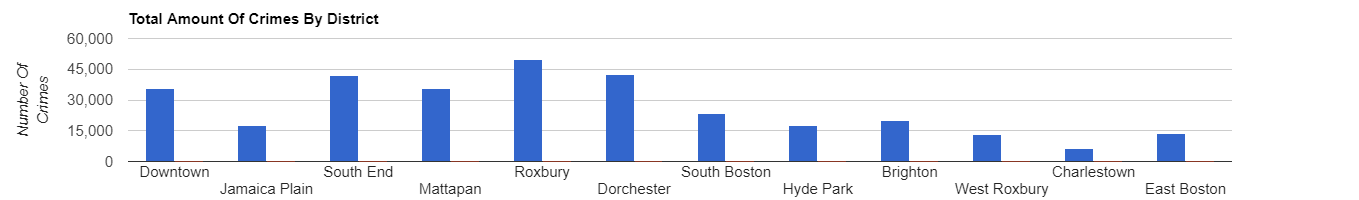

In [51]:
%%chart columns --data crimes_districts_boston
vAxis:
  title: Number Of Crimes
legend: none
title: Total Amount Of Crimes By District

According to the chart, we can see that the top 3 districts where crimes happens in Boston are Roxbury, South End, and Dorchester. However, we should also consider district population as well. To adjust for population, by dividing it from total crimes, we got the ratio for different districts based on population. In this case, the top 3 districts where crimes happens by population have now become Downtown, Jamaica Plain, and the South End. We believe that we need to see an increase in the amount of police officers in Roxbury, South End, and Dorchester. We would also want to see an increase in the amount of police officers per person in the Downtown, Jamaica Plain, and South End districts. We can get these police officers by decreasing the amount of officers in Charlestown, East Boston and Hyde Park, transferring them to the areas that need them. 

We can see the type of crimes commited in Boston and we started to break it down by district. Now we want to we see what are some of the most common type of crimes in Boston? We are looking to see if we can we hire police officers to the Boston PD that specialize in those type of crimes and give trainings to the current police force. 

In [52]:
%%bq query -n crimes_types_boston

SELECT Offense_Code_Group, count(Incident_Number) as Number_of_Crimes FROM `team-8-the-great.crime_in_boston.crime` 
GROUP BY Offense_Code_Group
ORDER BY count(Incident_Number) DESC
LIMIT 10;

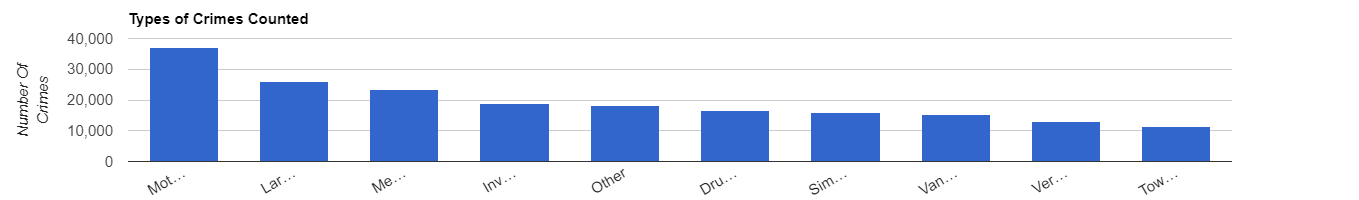

In [53]:
%%chart columns --data crimes_types_boston
vAxis:
  title: Number Of Crimes
legend: none
title: Types of Crimes Counted

We can see in the chart above that the most common types of crimes are motor vehicle accident response, larceny, medical assistance, investigate person, other, drug violation, simple assault, vandalism, verbal disputes, and towed, respectively. Predominately all but one of the most common types of crime are non-violent. If we were to hire police officers with special training we would want them to have soft skills that pertain to strong communication skills dealing with people that may be in altered state of minds emotionally and physically from accidents, medical needs, drug usage, and investigating persons that need help. We would also want the officers to have better hard skills in health emergency skills, much for the same reasons as officers will be dealing with people that may be hurt from accidents, need assistance, and from simple assault. This is just to help people and not to replace EMTs but rather give asssitance until more qualified persons can come and treat people. Under the same lens we would want to see training that promote these skills. We could even incentivize completion of courses and certifications to have a better trained police force to react in the Boston crime enviroment. 

We can see the most common types of crimes in Boston as a whole. We decided to break it down further and see the top crimes in each district to identify if certain districts need different skills in the police force than what we saw in the aggregate of Boston crime. This is so that we can adjust trainings and hires for those specific districts. 

In [54]:
%%bq query
select * from  
(select district, districtname, offense_code_group, count, rank()over(partition by district order by count desc) as rnk
from 
(select c.district, t.districtname, count(incident_number) as count, offense_code_group
FROM `team-8-the-great.crime_in_boston.crime` as c JOIN `team-8-the-great.crime_in_boston.districtname` as t ON t.district = c.district
group by c.district,c.offense_code_group, t.districtname
order by c.offense_code_group, c.district))
where rnk <= 3 

district,districtname,offense_code_group,count,rnk
A1,Downtown,Larceny,4704,1
A1,Downtown,Motor Vehicle Accident Response,2847,2
A1,Downtown,Simple Assault,2320,3
A15,Charlestown,Motor Vehicle Accident Response,960,1
A15,Charlestown,Larceny,502,2
A15,Charlestown,Medical Assistance,483,3
A7,East Boston,Motor Vehicle Accident Response,1516,1
A7,East Boston,Medical Assistance,1301,2
A7,East Boston,Drug Violation,901,3
B2,Roxbury,Motor Vehicle Accident Response,6407,1


Most of the district's top offense type is Motor Vehicle Accident Response, besides South End, and Downtown which instead are both Larceny. Downtown also has Simple Assault in the top three offense types. Downtown and South End are the most asimiliar to the rest of the districts. For these two districts we would want extra training for the police officers in investigational skills for theft. For the Downtown officers, de-escalation skills, so if they were to arrive at the scene with the assault still taking place they could better de-escalate the situation.  

Now we know the most crime heavy districts, we know the frequency of crimes, and we also know how much of each type of crime is commited. We want to break these down to our own 3 designed categories. Can we get a bigger picture of the type of crimes that happen by category, is violent crime more common than non-violent crime? We can see the top crimes and train the officers to deal with the top offenses but we want to ask do we need to have a more tactically trained police or something different as a whole? We want to see crime in a more genereal sense than is given in the dataset.     

In [55]:
%%bq query -n cimes_streets_boston

select c.DISTRICT, l.Level,  ST_GeogPoint(Long, Lat)as geo from `team-8-the-great.crime_in_boston.crime` as c 
inner join `team-8-the-great.crime_in_boston.districtname` as d on c.DISTRICT  = d.district
inner join `team-8-the-great.crime_in_boston.level` as l on l. OFFENSE_CODE_GROUP = c. OFFENSE_CODE_GROUP
where (c.DISTRICT = 'A1' or c.DISTRICT = 'D4'or c.DISTRICT = 'E13')and (c.Long is not null and c.Lat is not null) 

##The data and graphic above are used in a third party software.

Answer: We used BigQuery Geo Viz to visualize a graph that will be shown on the final presentation. We first, classified crimes in different severity levels. Level 5 are assigned things like Explosive and Homicide crimes. While other non-violent crimes like Evading Fare is assigned level 1. Obviously
clients can personize these catogories to reach the results they are interested in, we laid the foundation for the project for the Boston PD and can adjust what they would define in each level. 

According to our visualization, Downtown has a high concentration of level violent crime, level 5, especially near downtown crossing. We would want police officers that are more tatically trained near this location just in case. While the South End shows no distinct pattern, and is distrubuted evenly amongst the area. However, it should be noted that it is a little more crime heavy south of the Washington area in the South End. In Jamaica Plain, the most severe crime happened inside of a quasi-looking triangle area, which include, Centre St, Perkin St, and Columbus Ave. We can assign police officers, designed patrol routes and even increase stations based on this information.

We have gotten some of the more genereal views of Boston and saw the breakdown by district. We want to look at months and the total amount of crime. Are certain months more likely to have more people commiting crimes during them. Can we adjust the amount of police officers during certain months? 

In [56]:
%%bq query -n year_2016_VS_year_2017

SELECT MONTH, l.TOTAL_MONTH as Crime_Month_2016, r.TOTAL_MONTH as Crime_Month_2017
FROM `crime_in_boston.CRIME_2016_MONTH`  AS l
JOIN `crime_in_boston.CRIME_2017_MONTH`  AS r
USING(MONTH)

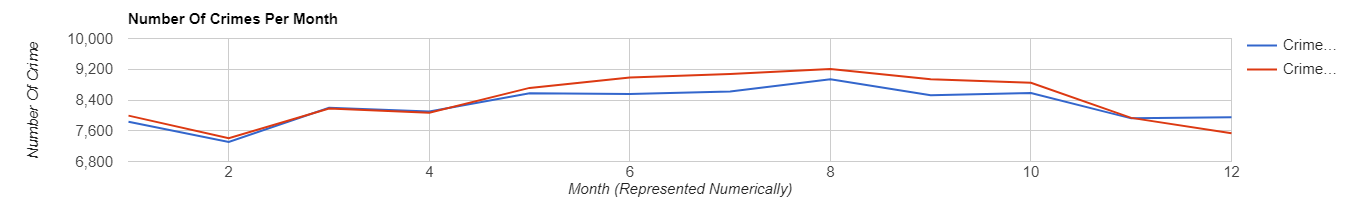

In [57]:
%%chart line --data year_2016_VS_year_2017
hAxis:
  title: Month (Represented Numerically)
vAxis:
  title: Number Of Crime
title: Number Of Crimes Per Month

Answer: We can see in the graphic that for both years there is a genereal increase in crime during the late spring into early fall months. We would want to see an increase of the amount of police officers during those months. We know its not possible to have seasonal temporary police officers for many reasons. But what we can do is incentivise police officers to work more during certain months and increase the amount of time off during other months in return, as to not increase budget drastically. We can also incentivise police officers to take their personal vacations during months that do not need as many police officers. 

We saw how months affected the amount of crimes that occured. Can we go really deep with the data can we find out at which times of the day crime is more likely to occur at? What hours of the day are more common? We can use this information to better allocate police officers by shift.

In [58]:
%%bq query -n offense_code_group
SELECT HOUR, COUNT(OFFENSE_CODE_GROUP) 
FROM `crime_in_boston.crime` 
GROUP BY HOUR
ORDER BY HOUR DESC

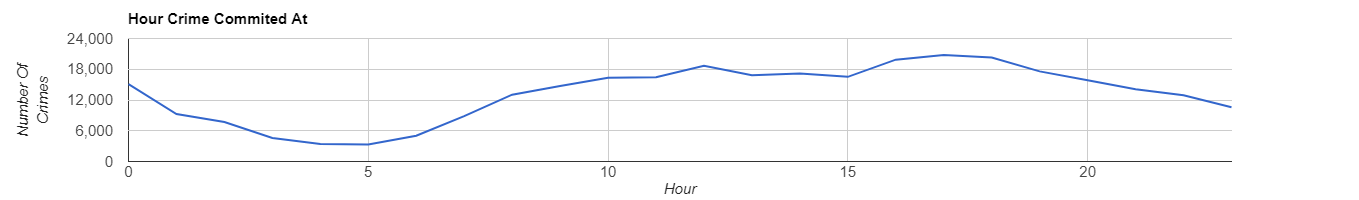

In [59]:
%%chart line --data offense_code_group
vAxis:
  title: Number Of Crimes
hAxis:
  title: Hour   
legend: none
title: Hour Crime Commited At

Answer: The most common time for crime to occur in Boston is 5 P.M. The other top times when crime occurs are 6 P.M, 4 P.M., 12 P.M., and 1 P.M. It seems that crime is more common during the afternoon hours.  

We can see at which hours crime is more likely to happen but we want to look at it in shifts as we will not be hiring police officers by the hour. We want to see if crime is more prevelant during certain shifts of the day. We can break down the shifts into the eight hour shifts. We want to take a look at the data and switch the police officers to certain shifts to combat the higher amount of crime during those time periods. 

In [60]:
%%bq query -n crime_shifts

SELECT my_range, COUNT(*) AS TOTAL
FROM( 
select
case when hour >= 7 and hour <15 then '7am-3pm'
when hour >=15 and hour < 23 then '3pm-11pm'
else '11pm-7am' end as my_range
from `crime_in_boston.crime` 
) as n
GROUP BY my_range
ORDER BY TOTAL DESC;

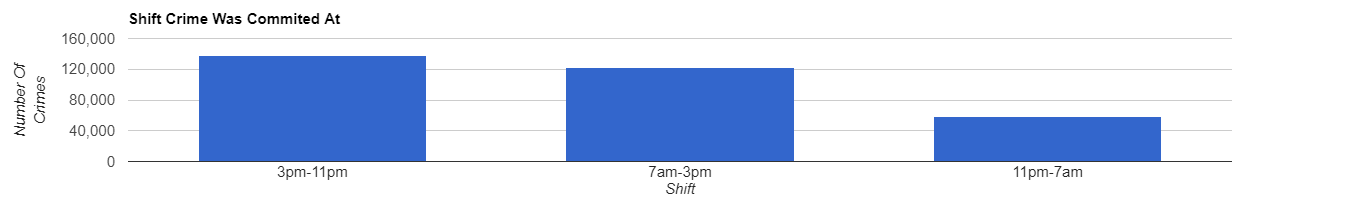

In [61]:
%%chart columns --data crime_shifts
vAxis:
  title: Number Of Crimes
hAxis:
  title: Shift 
legend: none
title: Shift Crime Was Commited At

Answer: We can see that the most crime is commited between 3 P.M. to 11 P.M., while the least amount of crime is commited between 11 P.M. to 7 A.M., with 7 A.M. to 3 P.M. in the middle but more like the 3 P.M. to 11 P.M. shift. We would recommend to take some of the police officers from the 11 P.M. to 7 A.M. shift and adjust their hours to the 3 P.M to 11 P.M. shift and 7 A.M. to 3 P.M. shift, with more going to the 3 P.M. to 11 P.M. shift. 

We want to bring it back home to Questrom. We wanted to see the top crimes that have occured on Commonwealth Ave in district D4, which is located around Questrom. What might students at Boston University, and us at Questrom may face for crimes? What should the police officers that patrol this area have better training in to deal with the situations that are more likely to occur?   

In [62]:
%%bq query -n crime_type_distribute
SELECT cast(r.Level as string), COUNT(OFFENSE_CODE_GROUP) AS TOTAL 
FROM `crime_in_boston.Crime_commonwealth_table` as l
INNER join `crime_in_boston.level` AS r
USING(OFFENSE_CODE_GROUP)
GROUP BY Level
ORDER BY TOTAL DESC



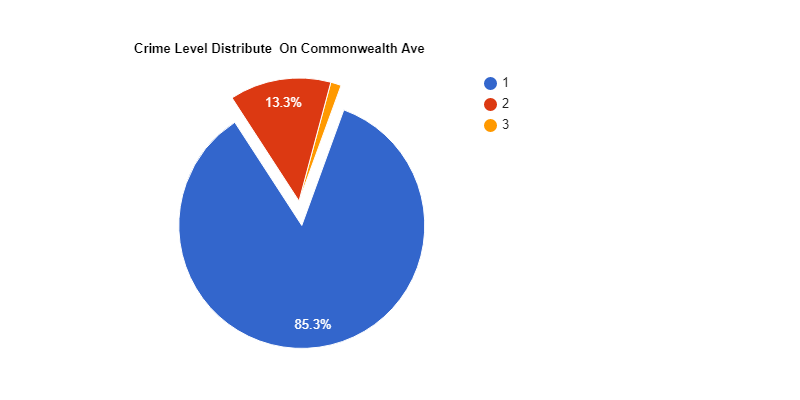

In [63]:
%%chart pie --data crime_type_distribute

title: Crime Level Distribute  On Commonwealth Ave
height: 400
width: 800
pieStartAngle: 20
slices:
  0:
    offset: .2

We can see in the graphic above the most common type of crime commited on Commonwealth Ave is Motor Vehicle Accident Response. The other top crimes on Commonwealth are not exactly similiar for the top crimes of Boston as a whole. The police officers here may need more investigational skills as the most common type of crimes are theft, theft from vehicle, and vandalism which all impact personal property. This is also interesting for the students of Questrom as we can see theft is a bigger problem here so you should be more careful with your personal belongings.  

We are trying to look at seasonality of crime on Commonwealth Ave. We want to break down when crime occurs on Commonwealth Ave by month for each year, just like we did for Boston but are drilling down the neighborhood. Do we notice if there are certain times with higher amounts of crimes per month. Does the start of the school year increase crime, the end, or do we see a genereal increase when students are on campus?

In [64]:
%%bq query -n year_month_total

SELECT MONTH, a.TOTAL_MONTH AS YEAR_2016, b.TOTAL_MONTH AS YEAR_2017
FROM `crime_in_boston.comm_year_2016`  as a
FULL JOIN `crime_in_boston.comm_year_2017` as b
USING(MONTH)
ORDER BY MONTH

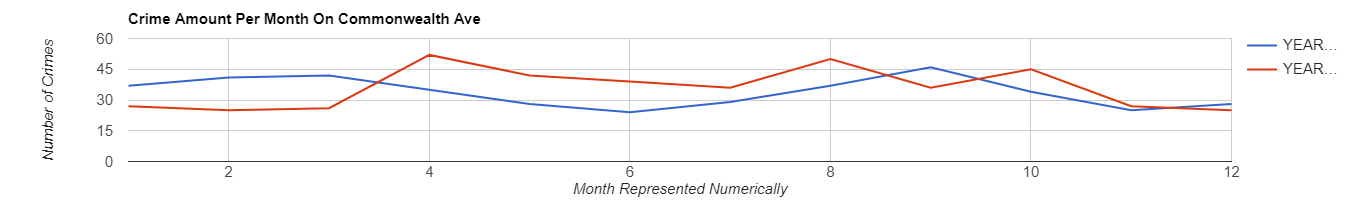

In [65]:
%%chart line --data year_month_total
vAxis:
  title: Number of Crimes
hAxis:
  title: Month Represented Numerically
title: Crime Amount Per Month On Commonwealth Ave

We can see from the graphic above that there is an increase in August & September which is when students arrive back on campus on Commonwealth. We can also see an increase in April which is near school end before finals. We can also see a decrease during the summer months, May through July, when the students leave school for the summer, this is the inverse to Boston as the aggregate crime increases in the summer, but not on Commonwealth Ave. There is however, a decrease during the winter months when students are still in school. We may want more police officers to be patrolling when the students are on campus on Commonwealth Avenue, especially during the start and end of the semester for students. 

Summary: 
We saw that Roxbury, South End, and Dorchester had the most amount of crime and we also saw that Motor Vehicle Accident Response, and Larceny were the most common types of crime. We broke it down further and saw the proportion of crime based on population and saw that Downtown, Jamaica Plain, and South End were the most common crime per person districts.  We went further with this exploration and saw the most common types of crime per each district. They were all pretty representative of Boston as a whole, however, Downtown and South End had Larceny as their number one crime. From this we recommend that there should be more police in Roxbury, South End, and Dorchester and an increase in the amount of police officer per person in Downtown, Jamaica Plain, and South End. We also want the police officers to have more training in communicating effectively with people that may be in altered states physically and mentally, as they will be dealing mostly with people in accidents, medical assistances, and other similar offenses.

We wanted to look at if time had an impact on crime. We broke down the data to see if crime was more common during certain months and also certain times of the days. We can see there is a bit of seasonality to crime. Crime is more likely to occur during the late spring into early fall months. We can also see that crime is more likely to occur during the afternoon and morning rather than at night. Our recommendations here are to have more police officers working during the summer and early fall months, by incentivizing working more during these times and incentivizing police officers to take personal and vacation time during months with lower crime to balance total time worked. We also want to shift some of the police officers from the night shift into the afternoon shift and the morning shift. 

We wanted to bring this crime data back home. We looked at data that happened on Commonwealth Ave in District 4. This is where Boston University is located including Questrom’s building. We asked many of the same questions as before but wanted to see something that related to us students. We saw that the most common types of crime to happen are Motor Vehicle Accident Response, Larceny From Motor Vehicle, Towed, Larceny, and Vandalism. We also saw that there was an increase of crime during the August and September months’ period and also the April and May months’ period. Both are marks for the start and end of classes on Boston University. We recommend to the Boston Police that police officers that patrol this area may want to have better investigational skills as much of the crime involves personal property destruction and theft. We also recommend more police officers patrol these streets during those periods with higher amount of crime.